In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KERAS_BACKEND'] = 'cntk'

### Helper Functions

In [2]:
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

### Generate sample data and split Train/Test

In [3]:
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Keras Model

In [5]:
# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
model.add(Dense(4, activation="tanh", name="Hidden-2"))
model.add(Dense(1, activation="sigmoid", name="output_layer"))
model.summary()

# Define Optimizer, Loss and Metrics
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### Learning without Callbacks

In [ ]:
# Start the Learning
model.fit(X_train, y_train, epochs=100, verbose=0)

### Learning and Use TensorBoard

In [10]:
# Start the Learning
from keras.callbacks import TensorBoard

callbacks = [
    TensorBoard(
        log_dir='tensorboard_log/simple_model_all_epochs',
        histogram_freq=1,
        write_graph=True
    )
]

model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=callbacks, validation_data=(X_test, y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 96us/step - loss: 0.0801 - acc: 0.9714 - val_loss: 0.2608 - val_acc: 0.9133
Epoch 2/100
700/700 [==============================] - 0s 86us/step - loss: 0.1031 - acc: 0.9629 - val_loss: 0.1269 - val_acc: 0.9567
Epoch 3/100
700/700 [==============================] - 0s 94us/step - loss: 0.0684 - acc: 0.9757 - val_loss: 0.1195 - val_acc: 0.9500


/anaconda/envs/py35/lib/python3.5/site-packages/keras/callbacks.py:690: UserWarning: You are not using the TensorFlow backend. histogram_freq was set to 0
  warnings.warn('You are not using the TensorFlow backend. '
/anaconda/envs/py35/lib/python3.5/site-packages/keras/callbacks.py:694: UserWarning: You are not using the TensorFlow backend. write_graph was set to False
  warnings.warn('You are not using the TensorFlow backend. '
/anaconda/envs/py35/lib/python3.5/site-packages/keras/callbacks.py:702: UserWarning: You are not using the TensorFlow backend. embeddings_freq was set to 0
  warnings.warn('You are not using the TensorFlow backend. '
/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


Epoch 4/100
700/700 [==============================] - 0s 92us/step - loss: 0.0747 - acc: 0.9700 - val_loss: 0.1401 - val_acc: 0.9467
Epoch 5/100
700/700 [==============================] - 0s 86us/step - loss: 0.0819 - acc: 0.9686 - val_loss: 0.1147 - val_acc: 0.9533
Epoch 6/100
700/700 [==============================] - 0s 89us/step - loss: 0.0723 - acc: 0.9743 - val_loss: 0.1321 - val_acc: 0.9567
Epoch 7/100
700/700 [==============================] - 0s 85us/step - loss: 0.0808 - acc: 0.9700 - val_loss: 0.1529 - val_acc: 0.9433
Epoch 8/100
700/700 [==============================] - 0s 84us/step - loss: 0.0665 - acc: 0.9686 - val_loss: 0.1775 - val_acc: 0.9333
Epoch 9/100
700/700 [==============================] - 0s 85us/step - loss: 0.0802 - acc: 0.9729 - val_loss: 0.1333 - val_acc: 0.9467
Epoch 10/100
700/700 [==============================] - 0s 91us/step - loss: 0.0870 - acc: 0.9657 - val_loss: 0.1850 - val_acc: 0.9233
Epoch 11/100
700/700 [==============================] - 0s 10

700/700 [==============================] - 0s 107us/step - loss: 0.0909 - acc: 0.9643 - val_loss: 0.1567 - val_acc: 0.9433
Epoch 65/100
700/700 [==============================] - 0s 91us/step - loss: 0.0580 - acc: 0.9800 - val_loss: 0.1408 - val_acc: 0.9500
Epoch 66/100
700/700 [==============================] - 0s 91us/step - loss: 0.0502 - acc: 0.9771 - val_loss: 0.1531 - val_acc: 0.9533
Epoch 67/100
700/700 [==============================] - ETA: 0s - loss: 0.0680 - acc: 0.968 - 0s 91us/step - loss: 0.0479 - acc: 0.9814 - val_loss: 0.1732 - val_acc: 0.9367
Epoch 68/100
700/700 [==============================] - 0s 78us/step - loss: 0.0524 - acc: 0.9800 - val_loss: 0.1470 - val_acc: 0.9533
Epoch 69/100
700/700 [==============================] - 0s 93us/step - loss: 0.0559 - acc: 0.9757 - val_loss: 0.1433 - val_acc: 0.9433
Epoch 70/100
700/700 [==============================] - 0s 87us/step - loss: 0.0567 - acc: 0.9743 - val_loss: 0.1637 - val_acc: 0.9500
Epoch 71/100
700/700 [=======

### Learning Using Callbacks

* EarlyStopping
* TensorBoard

In [11]:
# Start the Learning
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

callbacks = [
    TensorBoard(
        log_dir='tensorboard_log/simple_model_early',
        histogram_freq=1,
        embeddings_freq=1,
    ),
    EarlyStopping(
        monitor='val_acc', 
        patience=5, 
        mode='max'
    )
]

model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=callbacks, validation_data=(X_test, y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 177us/step - loss: 0.0585 - acc: 0.9743 - val_loss: 0.1440 - val_acc: 0.9567
Epoch 2/100
700/700 [==============================] - 0s 78us/step - loss: 0.0678 - acc: 0.9771 - val_loss: 0.1687 - val_acc: 0.9367
Epoch 3/100
 32/700 [>.............................] - ETA: 0s - loss: 0.0333 - acc: 0.9688

/anaconda/envs/py35/lib/python3.5/site-packages/keras/callbacks.py:690: UserWarning: You are not using the TensorFlow backend. histogram_freq was set to 0
  warnings.warn('You are not using the TensorFlow backend. '
/anaconda/envs/py35/lib/python3.5/site-packages/keras/callbacks.py:694: UserWarning: You are not using the TensorFlow backend. write_graph was set to False
  warnings.warn('You are not using the TensorFlow backend. '
/anaconda/envs/py35/lib/python3.5/site-packages/keras/callbacks.py:702: UserWarning: You are not using the TensorFlow backend. embeddings_freq was set to 0
  warnings.warn('You are not using the TensorFlow backend. '
/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


700/700 [==============================] - 0s 88us/step - loss: 0.0711 - acc: 0.9700 - val_loss: 0.1621 - val_acc: 0.9500
Epoch 4/100
700/700 [==============================] - 0s 96us/step - loss: 0.0482 - acc: 0.9800 - val_loss: 0.1665 - val_acc: 0.9433
Epoch 5/100
700/700 [==============================] - 0s 90us/step - loss: 0.0559 - acc: 0.9814 - val_loss: 0.1554 - val_acc: 0.9467
Epoch 6/100
700/700 [==============================] - 0s 89us/step - loss: 0.0522 - acc: 0.9771 - val_loss: 0.1510 - val_acc: 0.9533


In [7]:
from keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

### Print the performance

In [12]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

300/300 [==============================] - 0s 66us/step


Test loss: 0.15101081133509675 Test accuracy: 0.9533333333333334


/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


### Plot Decision Boundary

/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


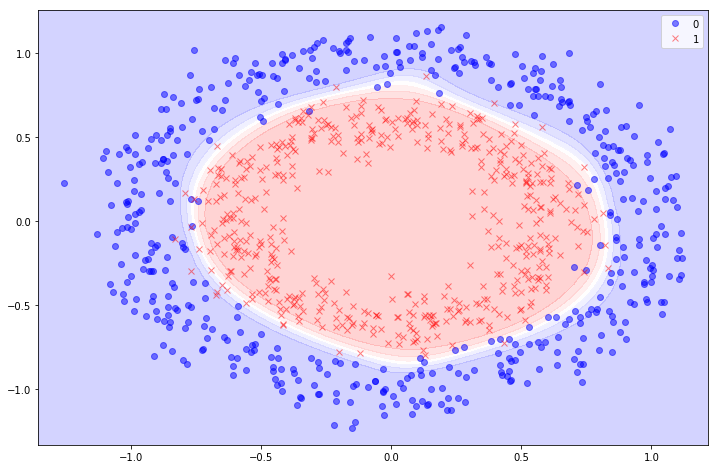

In [9]:
plot_decision_boundary(model, X, y).show()